# Reconhecimento Facial

Nesse tutorial aprenderemos como funciona os algoritmos de reconhecimento facial.

Esta atividade foi baseada no curso Applications of Linear Algebra (Part 2)  - DavidsonNext.

Este curso pode ser encontrado no site edx.org.

# Passo 1: Carregue as imagens

Em primeiro lugar, carregue algumas imagens em preto e branco utilizando o ícone de pastinha ali na esquerda do Colab. Para este tutorial escolhi 10 presidentes dos Estados Unidos. Você pode escolher 10 fotos de personalidades quaisquer. Também carregue sua foto para ver com qual personalidade você mais se parece.

Agora é só ler cada arquivo e guadar num vetor:

In [17]:
# bibliotecas para leitura e tratamento das imagens
from glob import glob
from PIL import Image
import numpy as np

# lendo e tratando as 11 imagens
filenames = glob("*.png")
gray_images = []
for file in filenames:
  gray_images.append(np.asarray(Image.open(file).convert("L")))

## Passo 2: Vejamos as imagens carregadas

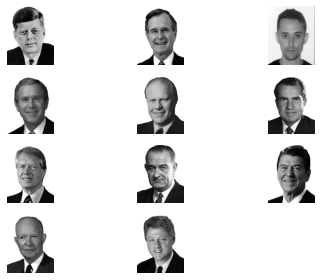

In [18]:
# biblioteca para mostrar as 11 imagens
import matplotlib.pyplot as plt

# mostrando as 11 imagens
for i, gray_image in enumerate(gray_images):
  plt.subplot(4,3,i+1)
  plt.imshow(gray_image, cmap='gray')
  plt.axis('off')
plt.tight_layout()
plt.show()

# Passo 3: Procurando o índice da sua imagem

No meu caso, minha imagem foi salva como a 3ª, logo o índice é o 2, um a menos!

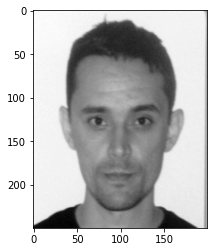

In [19]:
my_image_index = 2 # coloque o índice da sua aqui
plt.imshow(gray_images[my_image_index], cmap="gray")
plt.show()

# Passo 4: Calculando a distância usando o produto interno usual de matrizes

Para nossa facilidade a biblioteca Numpy possui a norma que é aplicável em matrizes! Logo podemos utilizar a distância provida da norma!

$$d(A,B) = || A - B ||$$

In [22]:
my_image = gray_images[my_image_index] # minha imagem
last_image = gray_images[10] # no meu caso é o Clinton

# nossa distância provida da norma usual
def d(A,B):
  return np.linalg.norm(A - B)

# hora de ver minha distância ao Clinton
d(my_image, last_image)

41914.48435803547

# Passo 5: Verificando todas as distâncias

In [23]:
for i in range(11):
  if i != my_image_index:
    filename = filenames[i].replace('.png',"")[2:]
    resultado = d(gray_images[i], my_image)
    print(f'd({filename}, eu) = {resultado}')

d(jfk, eu) = 23509.55350490519
d(GeorgeBush, eu) = 28151.291195964706
d(GeorgeWBush, eu) = 29795.30904353905
d(GeraldFord, eu) = 25108.800429331546
d(RichardNixon, eu) = 28026.171161969305
d(JimmyCarter, eu) = 27431.084630396956
d(LyndonJohnson, eu) = 24966.786437184903
d(RonaldReagan, eu) = 27179.234923006938
d(ike, eu) = 28406.99412116671
d(BillClinton, eu) = 27453.257420568512


# Passo 6: Exibindo o resultado

A menor distância foi com John F. Kennedy!

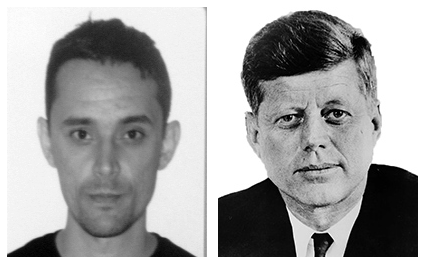

In [26]:
plt.subplot(1,2,1)
plt.imshow(my_image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(gray_images[0], cmap="gray")
plt.axis('off')
plt.tight_layout()
plt.show()